<a href="https://colab.research.google.com/github/Omkar-K01/TY_CFD/blob/main/CFD_FDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thermal diffusivity (alpha): 1.503759e-05 m²/s
Fourier number (λ): 0.0030


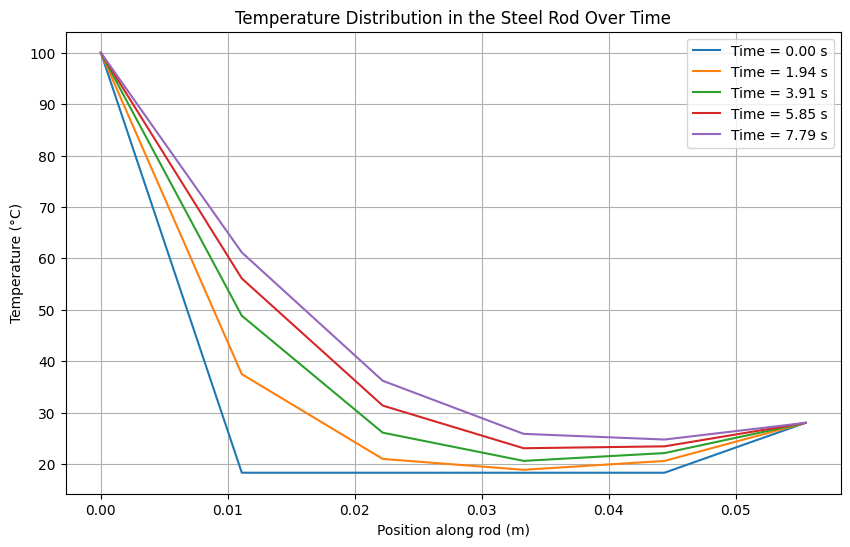

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
L = 0.0555
dx = 0.00971
dt = 0.01887
K = 56.96
rho = 7840.7
C = 483.1
T_init = 18.3
T_left = 100.0
T_right = 28.0
T_max = 7.8

# Derived parameters
alpha = K / (rho * C)
lambda_ = alpha * dt / dx**2
print(f"Thermal diffusivity (alpha): {alpha:.6e} m²/s")
print(f"Fourier number (λ): {lambda_:.4f}")

# Stability check
if lambda_ > 0.5:
    raise ValueError("Stability criterion violated! λ must be ≤ 0.5")

# Grid setup
nx = int(L / dx) + 1
nt = int(T_max / dt) + 1
x = np.linspace(0, L, nx)
T = np.ones((nt, nx)) * T_init
T[:, 0] = T_left
T[:, -1] = T_right

# FDM loop
for n in range(0, nt - 1):
    for i in range(1, nx - 1):
        T[n + 1, i] = T[n, i] + lambda_ * (T[n, i + 1] - 2 * T[n, i] + T[n, i - 1])

# Plotting results
time_indices = [0, int(nt*0.25), int(nt*0.5), int(nt*0.75), nt-1]
plt.figure(figsize=(10, 6))
for t in time_indices:
    plt.plot(x, T[t], label=f'Time = {t*dt:.2f} s')
plt.title('Temperature Distribution in the Steel Rod Over Time')
plt.xlabel('Position along rod (m)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()
